In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/death-cause-of-people-in-india-from-2009-2020/all death report 2020.docx
/kaggle/input/death-cause-of-people-in-india-from-2009-2020/all cause detail report.xlsx
/kaggle/input/death-cause-of-people-in-india-from-2009-2020/state wise death report.xlsx
/kaggle/input/death-cause-of-people-in-india-from-2009-2020/age wise 2020.xlsx
/kaggle/input/death-cause-of-people-in-india-from-2009-2020/age wise detailed.xlsx
/kaggle/input/death-cause-of-people-in-india-from-2009-2020/DEATH.csv


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('/kaggle/input/death-cause-of-people-in-india-from-2009-2020/DEATH.csv')
df.head()

,RANK,CAUSE,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,1,CERTAIN INFECTIOUS AND PARASITIC,121450,127396,120667,123823,112184,126469,130254,136060,147394,136748,154576,127933,1564954
1,2,NEOPLASMS,43528,44891,51710,50104,47397,57105,62876,58924,90240,82431,87315,85257,761778
2,3,BLOOD AND IMMUNE,14061,14598,14113,13830,13053,15201,15933,16559,23219,20673,19683,18215,199138
3,4,"ENDOCRINE, NUTRITIONAL AND METABOLIC",39250,38102,38275,39710,34722,38984,46835,52180,75324,81486,89410,104665,678943
4,5,MENTAL AND BEHAVIOURAL DISORDERS,797,1089,1297,3383,1583,1829,2597,3230,2314,2944,2764,4283,28110


In [5]:
#Checking for any null values
df.isnull().sum()

RANK     0
CAUSE    0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
Total    0
dtype: int64

In [6]:
X = df[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]

In [9]:
#Standardization for KMeans clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
#Now determining the optimum number of clusters using elbow method
inertia = []
for n in range(1,11):
    kmeans = KMeans(n_clusters=n,n_init='auto',random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

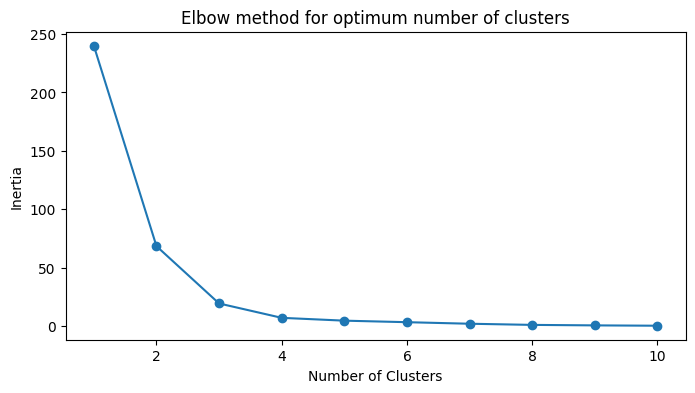

In [11]:
#Elbow curve
plt.figure(figsize=(8,4))
plt.plot(range(1,11),inertia,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimum number of clusters')
plt.show()

In [17]:
#Let,s choose the number of clusters be 3
k = 3
kmeans = KMeans(n_clusters=k,n_init="auto",random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [19]:
print(df[['CAUSE','Cluster']].sort_values(by='Cluster'))

                                           CAUSE  Cluster
19                    CODES FOR SPECIAL PURPOSES        0
2                               BLOOD AND IMMUNE        0
16    CONGENITAL MALFORMATIONS  AND CHROMOSOMAL         0
4               MENTAL AND BEHAVIOURAL DISORDERS        0
5                 DISEASES OF THE NERVOUS SYSTEM        0
6                 DISEASES OF THE EYE AND ADNEXA        0
7                DISEASES OF THE EAR AND MASTOID        0
14          PREGNANCY, CHILDBIRTH AND PUERPERIUM        0
11  DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE        0
12        DISEASES OF THE MUSCULOSKELETAL SYSTEM        0
13                                 GENITOURINARY        0
8             DISEASES OF THE CIRCULATORY SYSTEM        1
17                      NOT ELSEWHERE CLASSIFIED        2
15                              PERINATAL PERIOD        2
0               CERTAIN INFECTIOUS AND PARASITIC        2
18                             INJURY, POISONING        2
3           EN

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

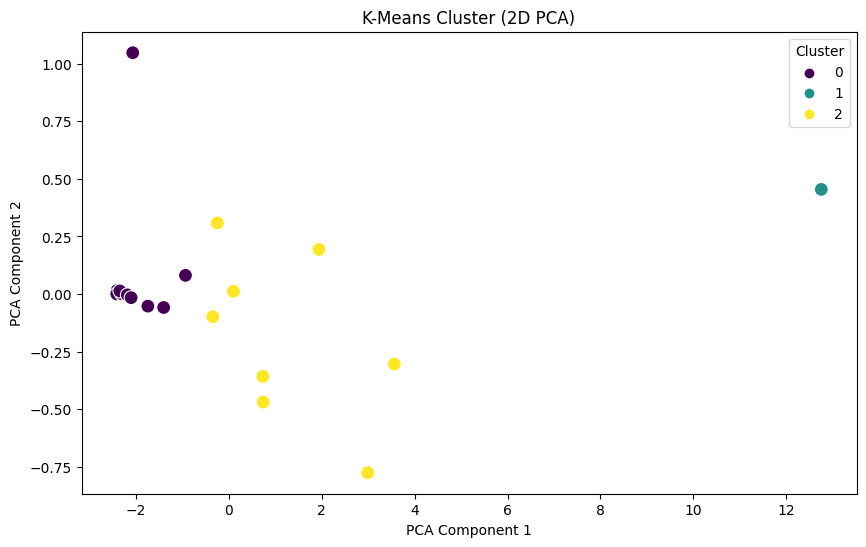

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=df['Cluster'],palette='viridis',s=100)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Cluster (2D PCA)')
plt.show()